# Toy networks

In [14]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


## Introduction

These are some toy network examples we can use to start doing simulations. I'm using the library **networkx**, which provides lots of functionality and makes it easy to manipulate nodes/edges, get subnetworks, etc. For this to work you need to install it first. Also make sure you have the library **matplotlib** for the plotting to work.

The networks are weighted, so we can do a more realistic simulation if we want to (and compare with the old one). For convenience, I also include a function that turns it into an unweighted network (where edges can just be 1 and -1).

Currently, there are four toy examples implemented. You can choose which example you want by the keyword "which" in the toy_graph funcion.

In [96]:
def get_toy_graph(which='simplest'):
    '''
    Returns networkx object of toy examples to test model on. 
    
    which: Choose which toy example to return. Can be one of 'simplest', 'simple', 'feedback', 'multiple_regulation'
    and 'multiple_regulation_feedback'.
    '''
    G = nx.DiGraph()
    
    # May the gods of programming languages forgive me for this shitty code.
    if which == 'simplest':
        G.add_edge('TF', 'gene1', weight=0.8)
        G.add_edge('TF', 'gene2', weight=-1.2)
    elif which == 'simple':
        G.add_edge('TF1.1', 'TF2.1', weight=0.8)
        G.add_edge('TF1.1', 'TF2.2', weight=-1.2)
        G.add_edge('TF2.1', 'gene1', weight=1.5)
        G.add_edge('TF2.1', 'gene2', weight=-0.4)
        G.add_edge('TF2.2', 'gene3', weight=0.9)
        G.add_edge('TF2.2', 'gene4', weight=-2.2)
    elif which == 'feedback':
        G.add_edge('TF1.1', 'TF2.1', weight=0.8)
        G.add_edge('TF1.1', 'TF2.2', weight=1.2)
        G.add_edge('TF2.1', 'gene1', weight=1.5)
        G.add_edge('TF2.1', 'gene2', weight=-0.4)
        G.add_edge('TF2.2', 'gene3', weight=0.9)
        G.add_edge('TF2.2', 'gene4', weight=-2.2)
        G.add_edge('TF2.2', 'TF1.1', weight=-1.5) # Feedback.
    elif which == 'feedback_bad':
        G.add_edge('TF1.1', 'TF2.1', weight=0.8)
        G.add_edge('TF1.1', 'TF2.2', weight=-1.2) # bad term
        G.add_edge('TF2.1', 'gene1', weight=1.5)
        G.add_edge('TF2.1', 'gene2', weight=-0.4)
        G.add_edge('TF2.2', 'gene3', weight=0.9)
        G.add_edge('TF2.2', 'gene4', weight=-2.2)
        G.add_edge('TF2.2', 'TF1.1', weight=-1.5) # Feedback.
    elif which == 'multiple_regulation':
        G.add_edge('TF1.1', 'TF2.1', weight=0.8)
        G.add_edge('TF1.1', 'TF2.2', weight=-1.2)
        G.add_edge('TF2.1', 'gene1', weight=1.5)
        G.add_edge('TF2.1', 'gene2', weight=-0.4)
        G.add_edge('TF2.2', 'gene3', weight=0.9)
        G.add_edge('TF2.2', 'gene4', weight=-2.2)
        G.add_edge('TF2.2', 'gene2', weight=-0.7)
        G.add_edge('TF2.1', 'gene3', weight=-0.7)
    elif which == 'multiple_regulation_feedback':
        G.add_edge('TF1.1', 'TF2.1', weight=0.8)
        G.add_edge('TF1.1', 'TF2.2', weight=-1.2)
        G.add_edge('TF2.1', 'gene1', weight=1.5)
        G.add_edge('TF2.1', 'gene2', weight=-0.4)
        G.add_edge('TF2.2', 'gene3', weight=0.9)
        G.add_edge('TF2.2', 'gene4', weight=-2.2)
        G.add_edge('TF2.2', 'gene2', weight=-0.7)
        G.add_edge('TF2.1', 'gene3', weight=-0.7)
        G.add_edge('gene3', 'TF1.1', weight=-0.5)
    return G

def discretize_edges(G):
    '''
    Takes a graph with edge weights and turns it into the discretized
    version, where edges are {-1,0, 1}.
    
    returns: networkx DiGraph with discretized weight.
    '''
    H = G.copy()
    for u,v,d in H.edges(data=True):
        d['weight'] = np.sign(d['weight'])
    return H

def split_adj_matrix(A):
    '''
    Takes in matrix of 1 and -1 and returns two matrices
    '''
    Aa = np.array((A.toarray() == 1), dtype = 'int32') # Consider making this float64 instead.
    Ai = np.array((A.toarray() == -1), dtype = 'int32')
    return Aa, Ai

In [84]:
def visualize(G, node_color='r'):
    edges, weights = zip(*nx.get_edge_attributes(G,'weight').items())

    pos = nx.spring_layout(G, weight=None) # get edge positions
    #pos = nx.graphviz_layout(G)
    nx.draw(G, pos, node_color=node_color, edgelist=edges,
            edge_color=weights, node_cmap=plt.cm.coolwarm, 
            edge_cmap=plt.cm.coolwarm,with_labels = True)
    # May want to try other colormaps.
    plt.show()
    

## Example

### Visualization

The toy examples have continuous edges. You can plot the example graphs as follows. 

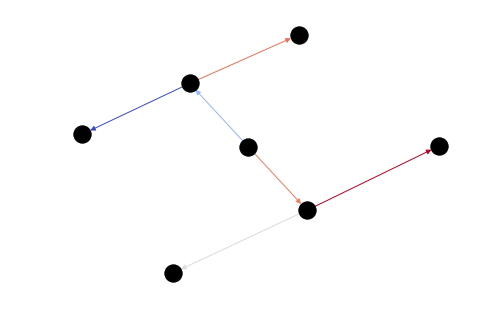

In [17]:
G = get_toy_graph('simple') # simplest is even smaller
visualize(G)

The edge colors in the visualization above are not yet "centered" at zero (I think the automatic thing is to use the middle in-between the endpoints of the data as the blue to red transition point). I still need to figure out how to force it to be 0.

You can also get the discretized version of the graph like this:

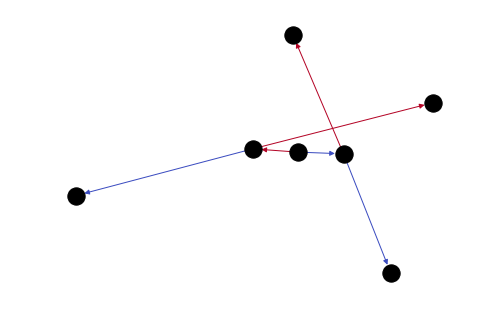

In [18]:
H = discretize_edges(G)
visualize(H)

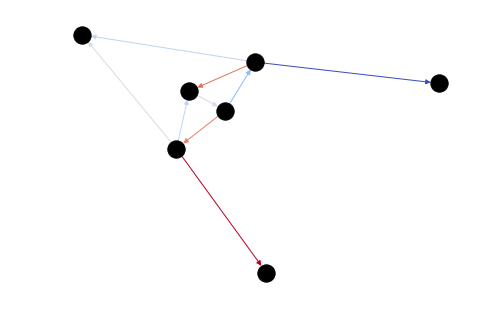

In [19]:
G = get_toy_graph('multiple_regulation_feedback') # simplest is even smaller
visualize(G)

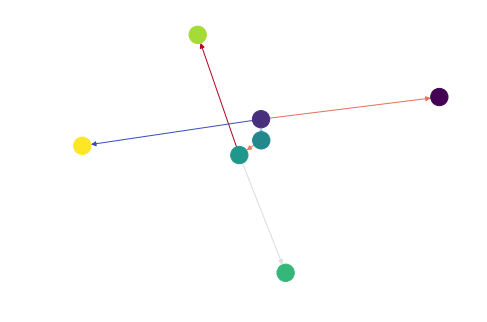

In [54]:
visualize(G, node_color=[0, 0.1, -0.5, 0.6, 0.3, -0.7, 0.8])

### Weight and adjacency matrix

We can get the weight matrix by simply doing

In [21]:
W = nx.adjacency_matrix(G)
print(W)

  (0, 1)	0.8
  (0, 2)	-1.2
  (1, 3)	1.5
  (1, 4)	-0.4
  (1, 5)	-0.7
  (2, 4)	-0.7
  (2, 5)	0.9
  (2, 6)	-2.2
  (5, 0)	-0.5


The reason the output looks a little weird is that by default networkx uses a special type of numpy array that's optimized for sparse matrices. If necessary, it's simple to convert it to the regular numpy array.

In [22]:
W.toarray()

array([[ 0. ,  0.8, -1.2,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  1.5, -0.4, -0.7,  0. ],
       [ 0. ,  0. ,  0. ,  0. , -0.7,  0.9, -2.2],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [-0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ]])

We can get the discretized version in the same way.

In [23]:
A = nx.adjacency_matrix(H)
print(A)

  (0, 1)	1.0
  (0, 2)	-1.0
  (1, 3)	1.0
  (1, 4)	-1.0
  (2, 5)	1.0
  (2, 6)	-1.0


In [24]:
A.toarray()

array([[ 0.,  1., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.]])

I included a function that splits this matrix into its activators and inhibitors. It may be a little inefficient, since it converts the matrices to the non-sparse form at the moment, but I'm having trouble getting it to work for the sparse versions for some reason.

In [25]:
Aa, Ai = split_adj_matrix(A)

In [26]:
Aa

array([[0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [27]:
Ai

array([[0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=int32)

These should be what we need to put stuff in the model. We should also have a more general function where we can just upload our weight matrix and run a simulation so we can run the "real" simulation to compare to the fake one (this should be simple to do).

# Model test

I coded in a numerical solver for the model, since we need it to work by tomorrow. I still think it's probably worth it to do the analytical solution to speed things up, which will be important for the huge matrix. Nonetheless, this should help us for the purposes of simulating the model for tomorrow's presentation. 

One thing I noticed is that the matrix that **networkx** gives us by default is the transpose of what we want. We just need to remember to do this when we simulate.

In [28]:
def f(y, t0, A, u, kf):
    return (A - kf * np.identity(len(A))) @ y + u

In [200]:
G = get_toy_graph('multiple_regulation_feedback')
G_d = discretize_edges(G)
A = nx.adjacency_matrix(G_d)
A = A.toarray()
A = A.transpose()
print(A)

[[ 0.  0.  0.  0.  0. -1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0. -1. -1.  0.  0.  0.  0.]
 [ 0. -1.  1.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.]]


In [201]:
list(G.nodes())

['TF1.1', 'TF2.1', 'TF2.2', 'gene1', 'gene2', 'gene3', 'gene4']

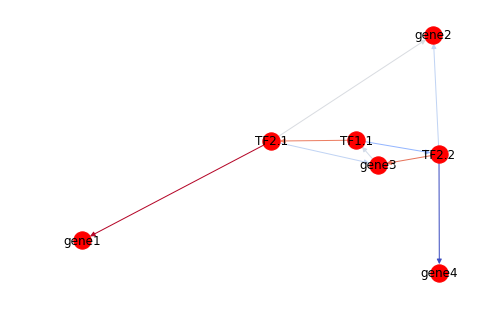

In [202]:
visualize(G)

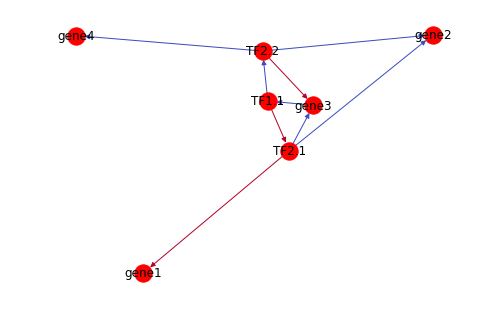

In [203]:
visualize(G_d)

In [204]:
u = np.array([1.0] + [0.0] * (len(A) - 1))
y0 = [0.0] * len(A)
u

array([1., 0., 0., 0., 0., 0., 0.])

In [205]:
from scipy.integrate import odeint
y = odeint(f, y0=y0,
           t=np.array([0, 5, 10, 15, 20, 30, 40, 60, 80]),
           args=(A, u, 1.0))

In [206]:
y

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 3.70370283e+00,  2.73346084e+00, -2.73346084e+00,
         1.96322462e+00,  0.00000000e+00, -3.92644924e+00,
         1.96322462e+00],
       [ 1.62528197e+01,  1.26935721e+01, -1.26935721e+01,
         9.86859532e+00,  0.00000000e+00, -1.97371906e+01,
         9.86859532e+00],
       [ 6.22807291e+01,  4.92259480e+01, -4.92259480e+01,
         3.88643614e+01,  0.00000000e+00, -7.77287228e+01,
         3.88643614e+01],
       [ 2.31104134e+02,  1.83221173e+02, -1.83221173e+02,
         1.45216442e+02,  0.00000000e+00, -2.90432884e+02,
         1.45216442e+02],
       [ 3.12152312e+03,  2.47734825e+03, -2.47734825e+03,
         1.96606631e+03,  0.00000000e+00, -3.93213261e+03,
         1.96606631e+03],
       [ 4.20066568e+04,  3.33404993e+04, -3.33404993e+04,
         2.64621655e+04,  0.00000000e+00, -5.29243311e+04,
         2.6462165

In [207]:
y[:, 0]

array([0.00000000e+00, 3.70370283e+00, 1.62528197e+01, 6.22807291e+01,
       2.31104134e+02, 3.12152312e+03, 4.20066568e+04, 7.60280717e+06,
       1.37600374e+09])